In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset=pd.read_csv("tree1.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,5].values

In [3]:
X

array([[1, '<21', 'High', 'Male', 'Single'],
       [2, '<21', 'High', 'Male', 'Married'],
       [3, '21-35', 'High', 'Male', 'Single'],
       [4, '>35', 'Medium', 'Male', 'Single'],
       [5, '>35', 'Low', 'Female', 'Single'],
       [6, '>35', 'Low', 'Female', 'Married'],
       [7, '21-35', 'Low', 'Female', 'Married'],
       [8, '<21', 'Medium', 'Male', 'Single'],
       [9, '<21', 'Low', 'Female', 'Married'],
       [10, '>35', 'Medium', 'Female', 'Single'],
       [11, '<21', 'Medium', 'Female', 'Married'],
       [12, '21-35', 'Medium', 'Male', 'Married'],
       [13, '21-35', 'High', 'Female', 'Single'],
       [14, '>35', 'Medium', 'Male', 'Married']], dtype=object)

In [8]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [4]:
dataset

,id,age,income,gender,marital_status,buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [5]:
dataset.head



<bound method NDFrame.head of     id    age  income  gender marital_status buys
0    1    <21    High    Male         Single   No
1    2    <21    High    Male        Married   No
2    3  21-35    High    Male         Single  Yes
3    4    >35  Medium    Male         Single  Yes
4    5    >35     Low  Female         Single  Yes
5    6    >35     Low  Female        Married   No
6    7  21-35     Low  Female        Married  Yes
7    8    <21  Medium    Male         Single   No
8    9    <21     Low  Female        Married  Yes
9   10    >35  Medium  Female         Single  Yes
10  11    <21  Medium  Female        Married  Yes
11  12  21-35  Medium    Male        Married  Yes
12  13  21-35    High  Female         Single  Yes
13  14    >35  Medium    Male        Married   No>

In [6]:
dataset.isnull().any()

id                False
age               False
income            False
gender            False
marital_status    False
buys              False
dtype: bool

In [7]:
df1=dataset.copy()


In [8]:
df1=df1.drop('buys',axis=1)


In [9]:
df1

,id,age,income,gender,marital_status
0,1,<21,High,Male,Single
1,2,<21,High,Male,Married
2,3,21-35,High,Male,Single
3,4,>35,Medium,Male,Single
4,5,>35,Low,Female,Single
5,6,>35,Low,Female,Married
6,7,21-35,Low,Female,Married
7,8,<21,Medium,Male,Single
8,9,<21,Low,Female,Married
9,10,>35,Medium,Female,Single


In [10]:
X=df1
lb=LabelEncoder()

In [11]:
x1=df1.apply(LabelEncoder().fit_transform)
regressor=DecisionTreeClassifier()
regressor.fit(x1.iloc[:,1:5],y)

DecisionTreeClassifier()

In [12]:
x_in=np.array([1,1,0,0])
y_pred=regressor.predict([x_in])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
y_pred

array(['Yes'], dtype=object)

In [14]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)


In [16]:
print("Training split input-",X_train.shape)


Training split input- (11, 5)


In [17]:
print("Testing split input-",X_test.shape)


Testing split input- (3, 5)


In [18]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [19]:
print('Decision Tree Classifier Created')


Decision Tree Classifier Created


In [20]:
y_pred=dtree.predict(X_test)


In [21]:
print("Classification report-\n",classification_report(y_test,y_pred))


Classification report-
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
cm=confusion_matrix(y_test,y_pred)


In [23]:
cm

array([[0, 1],
       [0, 2]])

Fontconfig warning: ignoring UTF-8: not a valid region tag


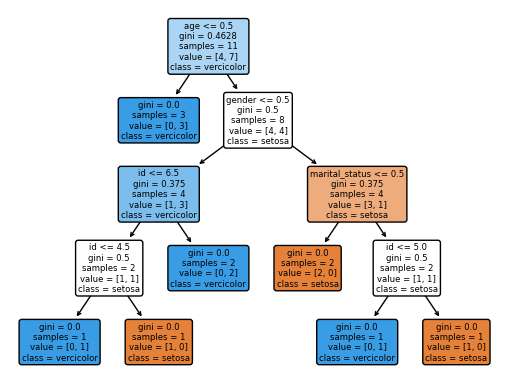

In [25]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)
